# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [ ]:
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

Now we specify folders containing data for each country.

In [ ]:
DataGuinea=DATA_FOLDER+'/ebola/guinea_data'
DataLiberia=DATA_FOLDER+'/ebola/liberia_data'
DataSL=DATA_FOLDER+'/ebola/sl_data'

And, for each country, we create a variable containing all csv files for this country.

In [ ]:
files_Guinea = glob.glob(DataGuinea + "/*.csv")
files_Liberia = glob.glob(DataLiberia + "/*.csv")
files_SL = glob.glob(DataSL + "/*.csv")

We create an empty DF and loop over the above created 3 files to fill the dataframe for all data coming from csv's. For each country dataframe created, we check if each column is unique.

In [386]:
df_Guinea = pd.DataFrame() 

for filename in files_Guinea:
    temp1 = pd.read_csv(filename)
    df_Guinea=df_Guinea.append(temp1)
    
df_Guinea['Country'] = 'Guinea'

cols=df_Guinea.columns.tolist()
cols
df_Guinea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 31
Data columns (total 26 columns):
Beyla          65 non-null object
Boffa          495 non-null object
Conakry        633 non-null object
Coyah          381 non-null object
Dabola         522 non-null object
Dalaba         245 non-null object
Date           714 non-null object
Description    714 non-null object
Dinguiraye     519 non-null object
Dubreka        499 non-null object
Forecariah     431 non-null object
Gueckedou      644 non-null object
Kerouane       380 non-null object
Kindia         147 non-null object
Kissidougou    519 non-null object
Kouroussa      495 non-null object
Lola           20 non-null object
Macenta        638 non-null object
Mzerekore      358 non-null object
Nzerekore      163 non-null object
Pita           496 non-null object
Siguiri        496 non-null object
Telimele       519 non-null object
Totals         712 non-null object
Yomou          460 non-null object
Country        714 non-

In [ ]:
df_Liberia = pd.DataFrame() 
 
for filename in files_Liberia:
    temp2 = pd.read_csv(filename)
    df_Liberia=df_Liberia.append(temp2)

df_Liberia['Country'] = 'Liberia'
cols=df_Liberia.columns.tolist()
cols
df_Liberia.info()

In [ ]:
df_SL = pd.DataFrame()
 
for filename in files_SL:
    temp3 = pd.read_csv(filename)
    df_SL=df_SL.append(temp3)
    
df_SL['Country'] = 'SierraLeon'
cols=df_SL.columns.tolist()
cols

Listing the columns above, we notice that some mistakes into colums names need to bo correct. Indeed, 'Police traning School'from SL dat needs to be corrected. This column seems to be duplicated. We need to check what is in each column.

In [ ]:
df_SL.count()

Count() returns the number of non-NaN values in each column. We see that "Police Traning school column" is full of NaN so we can drop it.

In [ ]:
df_SL = df_SL.drop('Police traning School', axis=1)

Let's check the columns is no longer in the dataframe.

In [ ]:
df_SL.info()

Now we need to concatenate the 3 countries dataframe

In [ ]:
Data_Ebola=[df_Guinea,df_Guinea,df_SL]

In [381]:
FinalData=pd.concat(Data_Ebola)

In [382]:
FinalData

,34 Military Hospital,Beyla,Bo,Bo EMC,Boffa,Bombali,Bomi County,Bong County,Bonthe,Conakry,...,Totals,Unnamed: 18,Variable,Western area,Western area combined,Western area rural,Western area urban,Yomou,date,variable
0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,5,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,6,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,9,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,8,...,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,78,...,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,95,...,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
FinalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7128 entries, 0 to 36
Data columns (total 68 columns):
34 Military Hospital      7 non-null float64
Beyla                     65 non-null object
Bo                        2142 non-null object
Bo EMC                    7 non-null float64
Boffa                     495 non-null object
Bombali                   2037 non-null object
Bomi County               2012 non-null float64
Bong County               2110 non-null float64
Bonthe                    2031 non-null object
Conakry                   633 non-null object
Country                   7128 non-null object
Coyah                     381 non-null object
Dabola                    522 non-null object
Dalaba                    245 non-null object
Date                      3866 non-null object
Description               714 non-null object
Dinguiraye                519 non-null object
Dubreka                   499 non-null object
Forecariah                431 non-null object
Gbarpolu County

Now each colum is unique and we can explore the data of this agregated DF.

In [ ]:
FinalData

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
df_metadata = pd.read_excel('Data/microbiome/metadata.xls')#We load the excel file metadata in a df

This file maps barcode with groups and sample. We need ton extract each of this colomn:

In [387]:
barcodes = df_metadata.BARCODE.values
groups = df_metadata.GROUP.values
samples = df_metadata.SAMPLE.values

The idea is the following: to merge all sheets, we first initiate a first dataframe using mapping from metadata. Indeed, names of the excel sheets correspond to barcodes values in metadata df.

In [388]:
df_final = pd.read_excel('Data/microbiome/' + barcodes[0] + '.xls', header=None, names=['Taxon', groups[0]],na_values='Unknown')
df_final.head()

,Taxon,EXTRACTION CONTROL
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7


And loop to add all the other sheets in the folder, with unique colums names formed by "Group" and "Sample" pairs.

In [389]:
for i in range(1, len(barcodes)):
    # Each iteration creates a new column
    temp = pd.read_excel('Data/microbiome/' + barcodes[i] + '.xls',na_values='Unknown', header=None, names=['Taxon', groups[i] + '_' + samples[i]])
    # Merge temp dataset with previous one on "Taxon" column
    df_final = df_final.merge(temp, on='Taxon')

In [390]:
df_final

,Taxon,EXTRACTION CONTROL,NEC 1_tissue,Control 1_tissue,NEC 2_tissue,Control 2_tissue,NEC 1_stool,Control 1_stool,NEC 2_stool,Control 2_stool
0,"Archaea ""Euryarchaeota"" Methanopyri Methanopyr...",12,47,46,10,72,23,59,9,50
1,"Bacteria ""Aquificae"" Aquificae Aquificales Aqu...",8,54,54,3,66,35,34,1,50
2,"Bacteria ""Bacteroidetes"" ""Sphingobacteria"" ""Sp...",3,3,5,13,4,4,3,4,18
3,"Bacteria ""Bacteroidetes"" ""Sphingobacteria"" ""Sp...",2,28,2,13,5,18,6,4,20
4,"Bacteria ""Bacteroidetes"" ""Sphingobacteria"" ""Sp...",2,9,2,1,10,7,11,1,27
5,"Bacteria ""Bacteroidetes"" Flavobacteria ""Flavob...",2,6,11,8,10,10,7,4,12
6,"Bacteria ""Bacteroidetes"" Flavobacteria ""Flavob...",4,5,2,3,13,2,14,1,7
7,"Bacteria ""Bacteroidetes"" Flavobacteria ""Flavob...",8,2,1,10,2,1,1,7,5
8,"Bacteria ""Chlamydiae"" Chlamydiae Chlamydiales ...",3,5,2,4,13,9,11,3,6
9,"Bacteria ""Deferribacteres"" Deferribacteres Def...",5,7,6,3,10,5,11,4,6


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [432]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')
import seaborn as sbn
from matplotlib.pyplot import pie, axis, show

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
df_titanic = pd.read_excel('Data/titanic.xls')

In [ ]:
df_titanic.head()

To get type of each attribute we use info() command.

In [391]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


We can see from above that for some columns, many data may be missing (ex : body,cabin). Only 50% of columns are full.

In [395]:
df_titanic.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


The table above give us meanigfull info about the data. We can see min and max values so the range of some attributes. 

It could be interesting to transform some atributes in categorical variables. Thoses values are : pcclass, sex, survived.

In [401]:
pd.Categorical(df_titanic.sex)
pd.Categorical(df_titanic.pclass)
pd.Categorical(df_titanic.survived)

[1, 1, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 1309
Categories (2, int64): [0, 1]

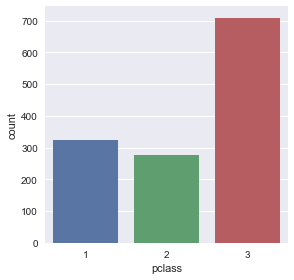

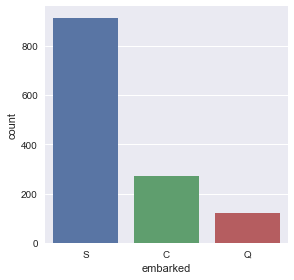

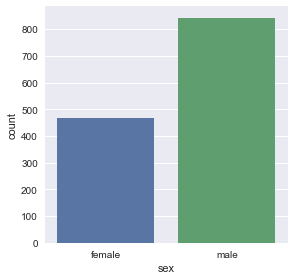

In [428]:
sbn.factorplot('pclass', data=df_titanic, kind='count')
sbn.factorplot('embarked', data=df_titanic, kind='count')
sbn.factorplot('sex', data=df_titanic, kind='count')

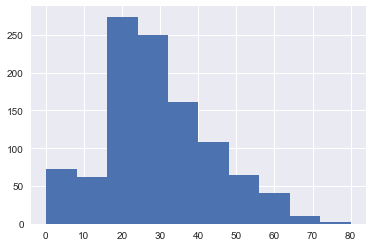

In [426]:
df_titanic.age.dropna().describe()
df_titanic['age'].dropna().hist(bins=10)

In [433]:
df_titanic.cabin.dropna().describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object

In [435]:
df_titanic.cabin.dropna().count()

295

In [462]:
CountA= 0
CountB= 0
CountC= 0
CountD= 0
CountE= 0
CountF= 0
CountG= 0
CountT= 0

for kbin in  df_titanic.cabin.dropna():
    if kbin.startswith("A"):
        CountA=CountA+1
    if kbin.startswith("B"):
        CountB=CountB+1
    if kbin.startswith("C"):
        CountC=CountC+1
    if kbin.startswith("D"):
        CountD=CountD+1
    if kbin.startswith("E"):
        CountE=CountE+1
    if kbin.startswith("F"):
        CountF=CountF+1
    if kbin.startswith("G"):   
        CountG=CountG+1
    if kbin.startswith("T"):
        CountT=CountT+1

In [483]:
Counts = pd.Series([CountA,CountB,CountC,CountD,CountE,CountF,CountG,CountT],index=['A Level', 'B Level', 
                                                                                    'C Level', 'D Level',
                                                                                   'E Level', 'F Level',
                                                                                   'G Level', 'T Level'])

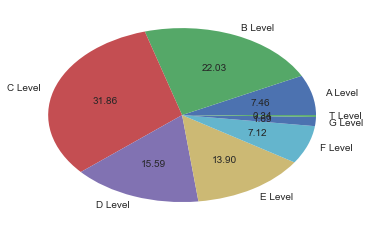

In [482]:
pie(Counts,labels=Counts.index ,autopct='%.2f');

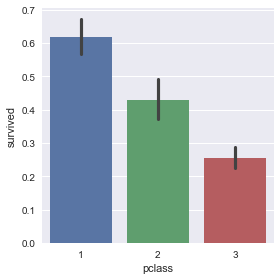

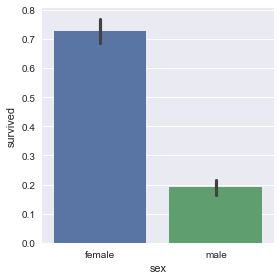

In [513]:
sbn.factorplot('pclass', 'survived', data=df_titanic,kind='bar');
sbn.factorplot('sex', 'survived', data=df_titanic,kind='bar');


Ceux qui ont survecu by travel class

In [543]:
ClassVsSurvived = df_titanic[["pclass", "survived"]].groupby(['pclass']).mean().reset_index()

In [544]:
ClassVsSurvived.pclass

0    1
1    2
2    3
Name: pclass, dtype: int64

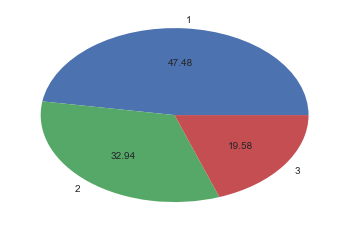

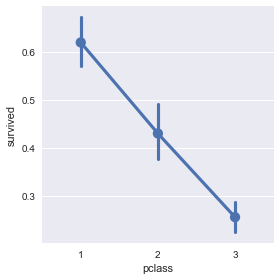

In [545]:
pie(ClassVsSurvived.survived,labels=ClassVsSurvived.pclass ,autopct='%.2f');
sns.factorplot('pclass', 'survived', order=[1,2,3], data=df_titanic);

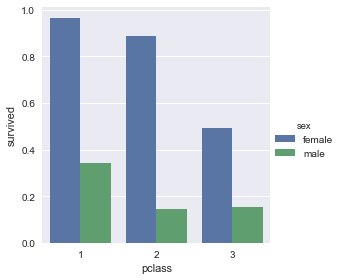

In [524]:
DataAgePclass = df_titanic[["sex", "pclass", "survived"]].groupby(['sex', 'pclass']).mean().reset_index()
                                                                    
DataAgePclass
sbn.factorplot(x="pclass", y="survived", hue="sex", kind='bar',data=DataAgePclass
              )